Reproduced code from paper SUPPORT VECTOR MACHINE BASED CLASSIFICATION FOR TOMATO LEAVES DISEASES 

(http://www.modern-journals.com/index.php/ijma/article/view/204/153)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import matplotlib.cm as cm
import seaborn as sns

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', size=18)        
plt.rc('axes', titlesize=22)      
plt.rc('axes', labelsize=18)      
plt.rc('xtick', labelsize=12)     
plt.rc('ytick', labelsize=12)     
plt.rc('legend', fontsize=12)   

plt.rcParams['font.sans-serif'] = ['Verdana']

In [ ]:
!wget https://raw.githubusercontent.com/pambnb/Argo2021/main/Labled_Features.csv

--2021-03-21 12:09:37--  https://raw.githubusercontent.com/pambnb/Argo2021/main/Labled_Features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4091897 (3.9M) [text/plain]
Saving to: ‘Labled_Features.csv.1’

Labled_Features.csv 100%[===================>]   3.90M   560KB/s    in 7.4s    

2021-03-21 12:09:45 (539 KB/s) - ‘Labled_Features.csv.1’ saved [4091897/4091897]



In [ ]:
df = pd.read_csv('Labled_Features.csv')
df.head(3)
# garbo ->  a linear filter used in myriad of image processing application for edge detection, texture analysis, feature extraction, etc. 

,Label,gaborenergy,gaborentropy,width,Height,area,perimeter,Extent,Solidity,Hull_Area,...,RedMean,GreenMean,BlueMean,RedVar,BlueVar,GreenVar,contrast,correlation,inverse difference moments,entropy
0,1,0.734682,0.782968,256,29.969833,65025.0,1020.0,0.992203,1.0,65025.0,...,29.969833,36.552261,23.773621,38.642642,31.083274,45.910445,129.773684,0.961836,0.694171,5.099258
1,1,0.537922,1.314809,256,35.560440,65025.0,1020.0,0.992203,1.0,65025.0,...,35.560440,55.279739,34.950378,41.609554,40.552338,61.527606,147.773875,0.973126,0.640997,6.016298
2,1,0.582021,1.273272,256,26.412216,65025.0,1020.0,0.992203,1.0,65025.0,...,26.412216,47.042618,42.393951,38.081266,58.522267,63.883732,196.702455,0.965218,0.714059,5.004834


In [ ]:
df.Label.value_counts()

9    5357
1    2127
3    1909
5    1771
6    1676
0    1591
7    1404
2     997
4     952
8     373
Name: Label, dtype: int64

Skewness: -0.165008
Kurtosis: -1.389606


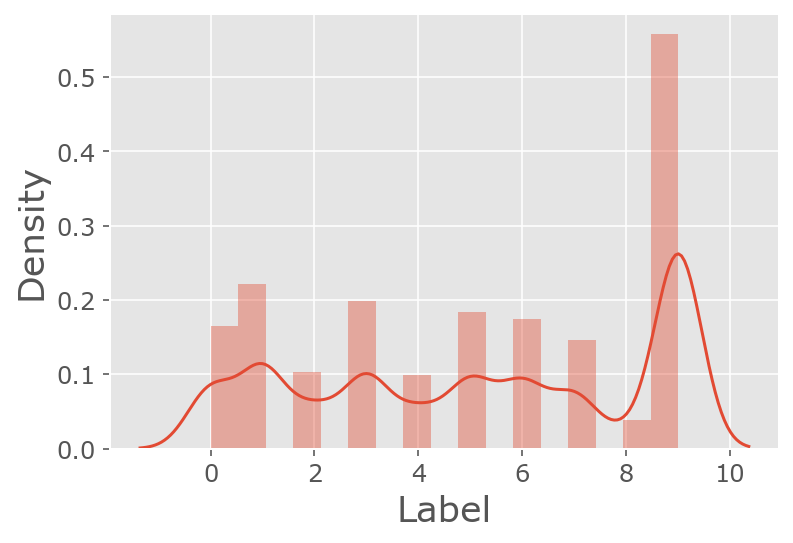

In [ ]:
import seaborn as sns
sns.distplot(df['Label']);
print("Skewness: %f" % df['Label'].skew())
print("Kurtosis: %f" % df['Label'].kurt())

From above bar char, the number of 9th feature is higher than any other numbers. The classes are not represented equally so this imply "Imbalanced data".

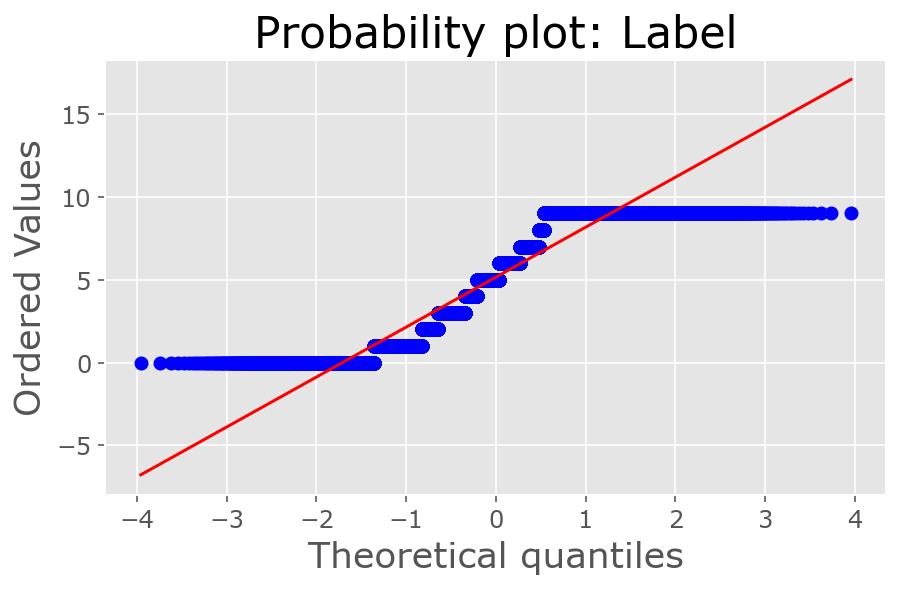

In [ ]:
plt.figure(figsize=(7,4))
_ = stats.probplot(df['Label'], plot=plt)
plt.title("Probability plot: Label")
plt.show()

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18157 entries, 0 to 18156
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Label                       18157 non-null  int64  
 1   gaborenergy                 18157 non-null  float64
 2   gaborentropy                18157 non-null  float64
 3   width                       18157 non-null  int64  
 4   Height                      18157 non-null  float64
 5   area                        18157 non-null  float64
 6   perimeter                   18157 non-null  float64
 7   Extent                      18157 non-null  float64
 8   Solidity                    18157 non-null  float64
 9   Hull_Area                   18157 non-null  float64
 10  AspectRatio                 18157 non-null  float64
 11  Rectangularity              18157 non-null  float64
 12  Circularity                 18157 non-null  float64
 13  EquiDimeter                 181

In [ ]:
df.shape

(18157, 24)

In [ ]:
df.isnull().sum()

Label                         0
gaborenergy                   0
gaborentropy                  0
width                         0
Height                        0
area                          0
perimeter                     0
Extent                        0
Solidity                      0
Hull_Area                     0
AspectRatio                   0
Rectangularity                0
Circularity                   0
EquiDimeter                   0
RedMean                       0
GreenMean                     0
BlueMean                      0
RedVar                        0
BlueVar                       0
GreenVar                      0
contrast                      0
correlation                   0
inverse difference moments    0
entropy                       0
dtype: int64

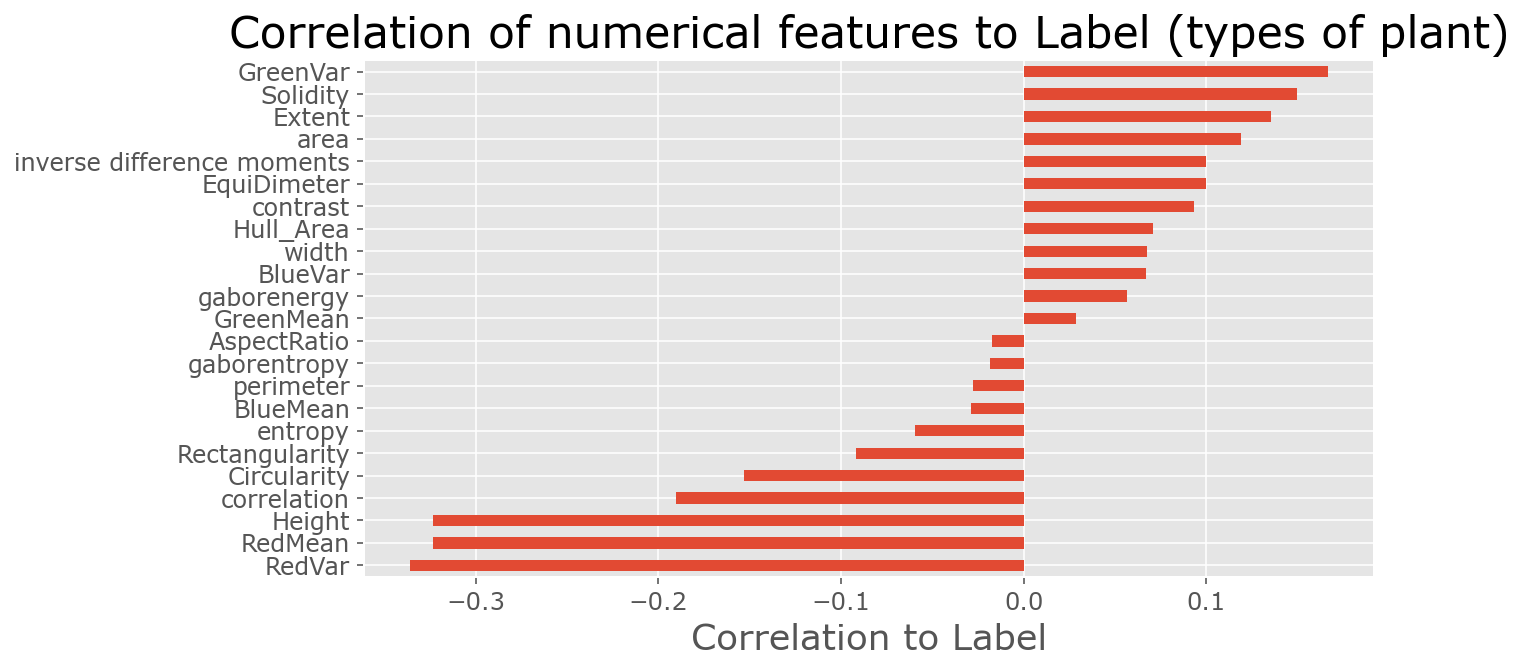

In [ ]:
corr = df.select_dtypes(include="number").corr()
plt.figure(figsize=(10,5))
corr["Label"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to Label (types of plant)")
plt.xlabel("Correlation to Label")
plt.tight_layout()
plt.show()

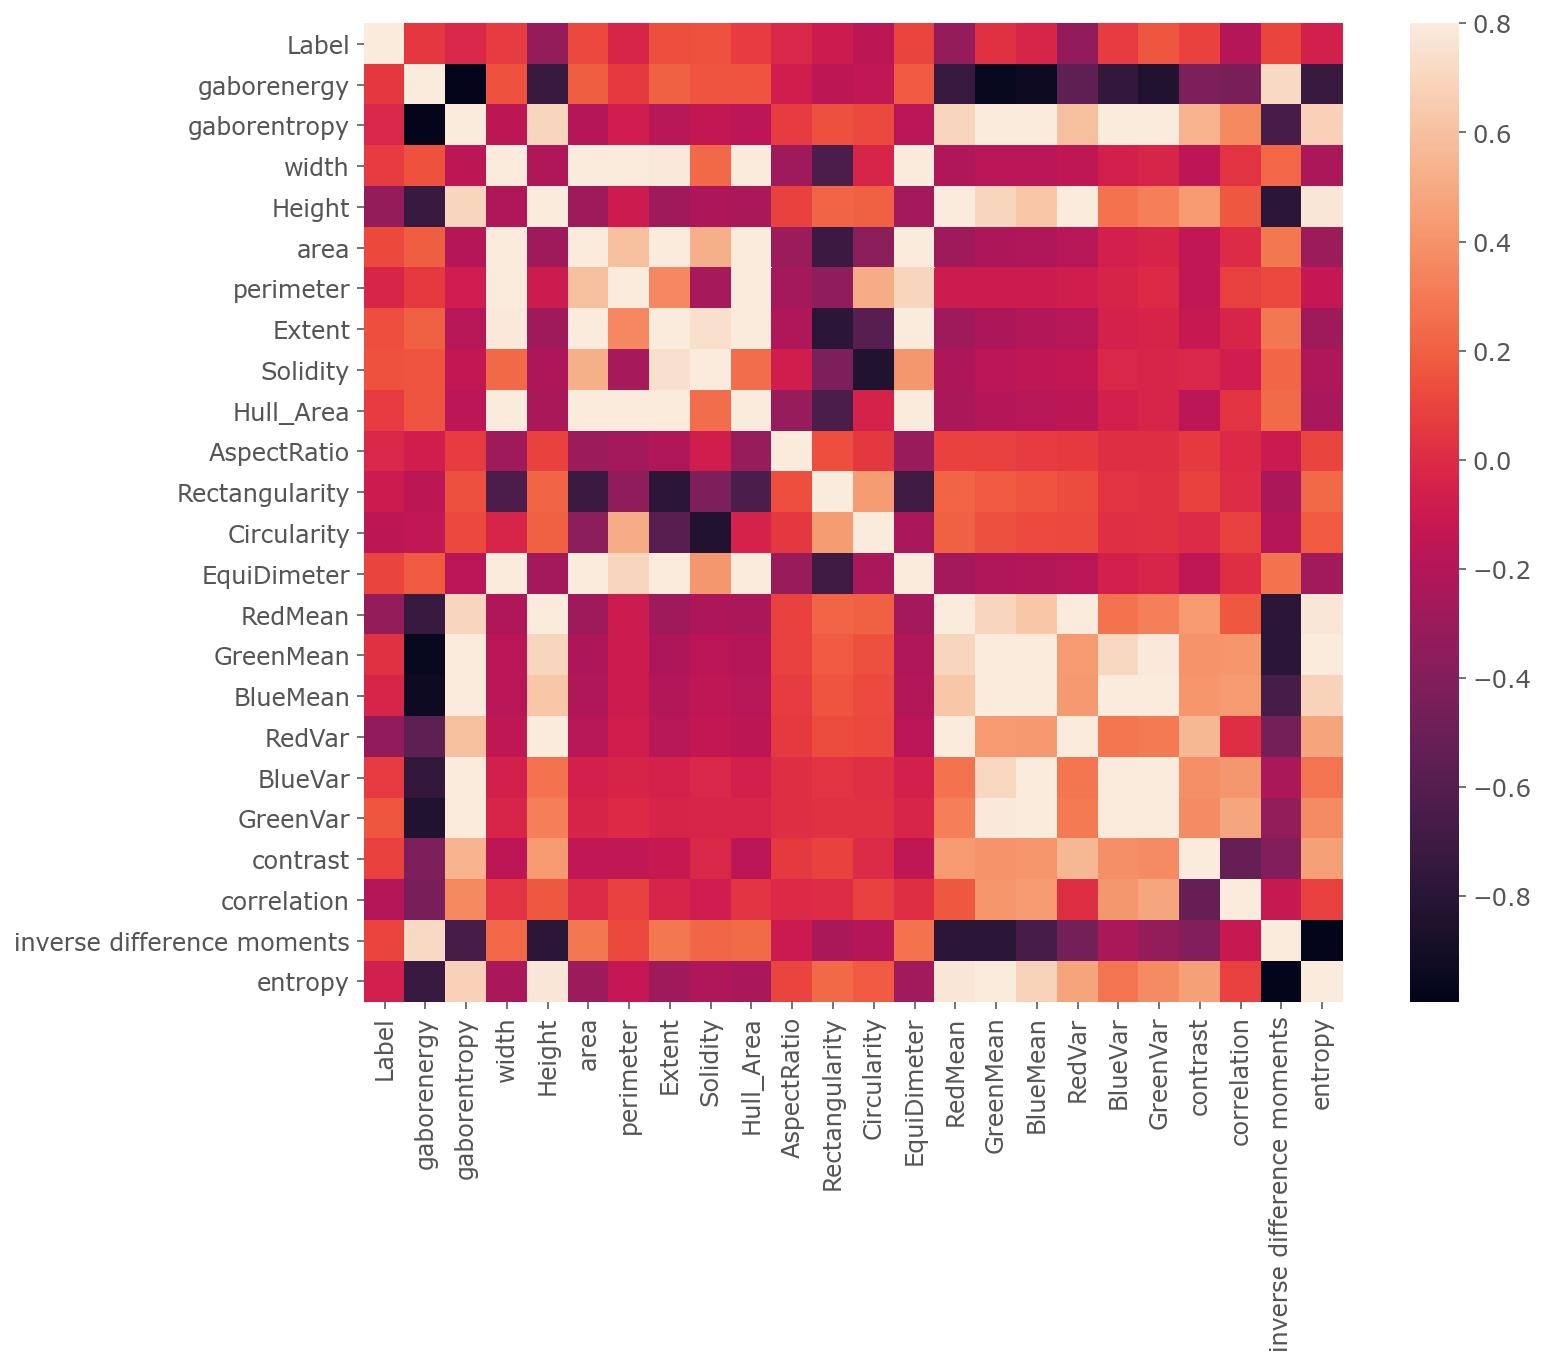

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

- Colors are highly correlated with garbo energy and inverse difference moments. {color-energy} 
- Color are correlated with area, perimeter, extent, solidity, hull area and equli dimeter. {color-Width, Height} 

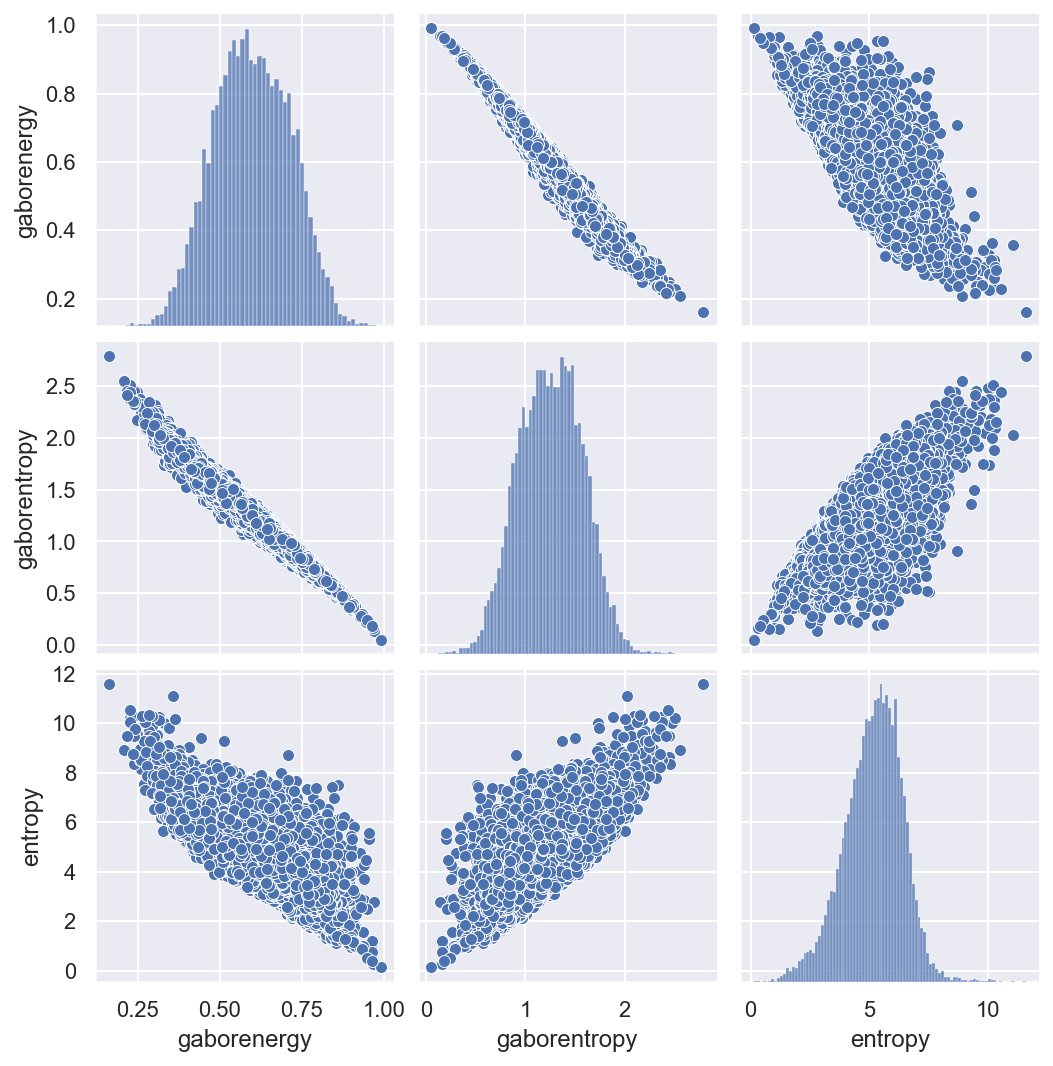

In [ ]:
import seaborn as sns
sns.set()
cols = ['gaborenergy', 'gaborentropy', 'entropy',]
sns.pairplot(df[cols], size = 2.5)
plt.show();

entropy and gaborentropy has positive relationship. While others have negative

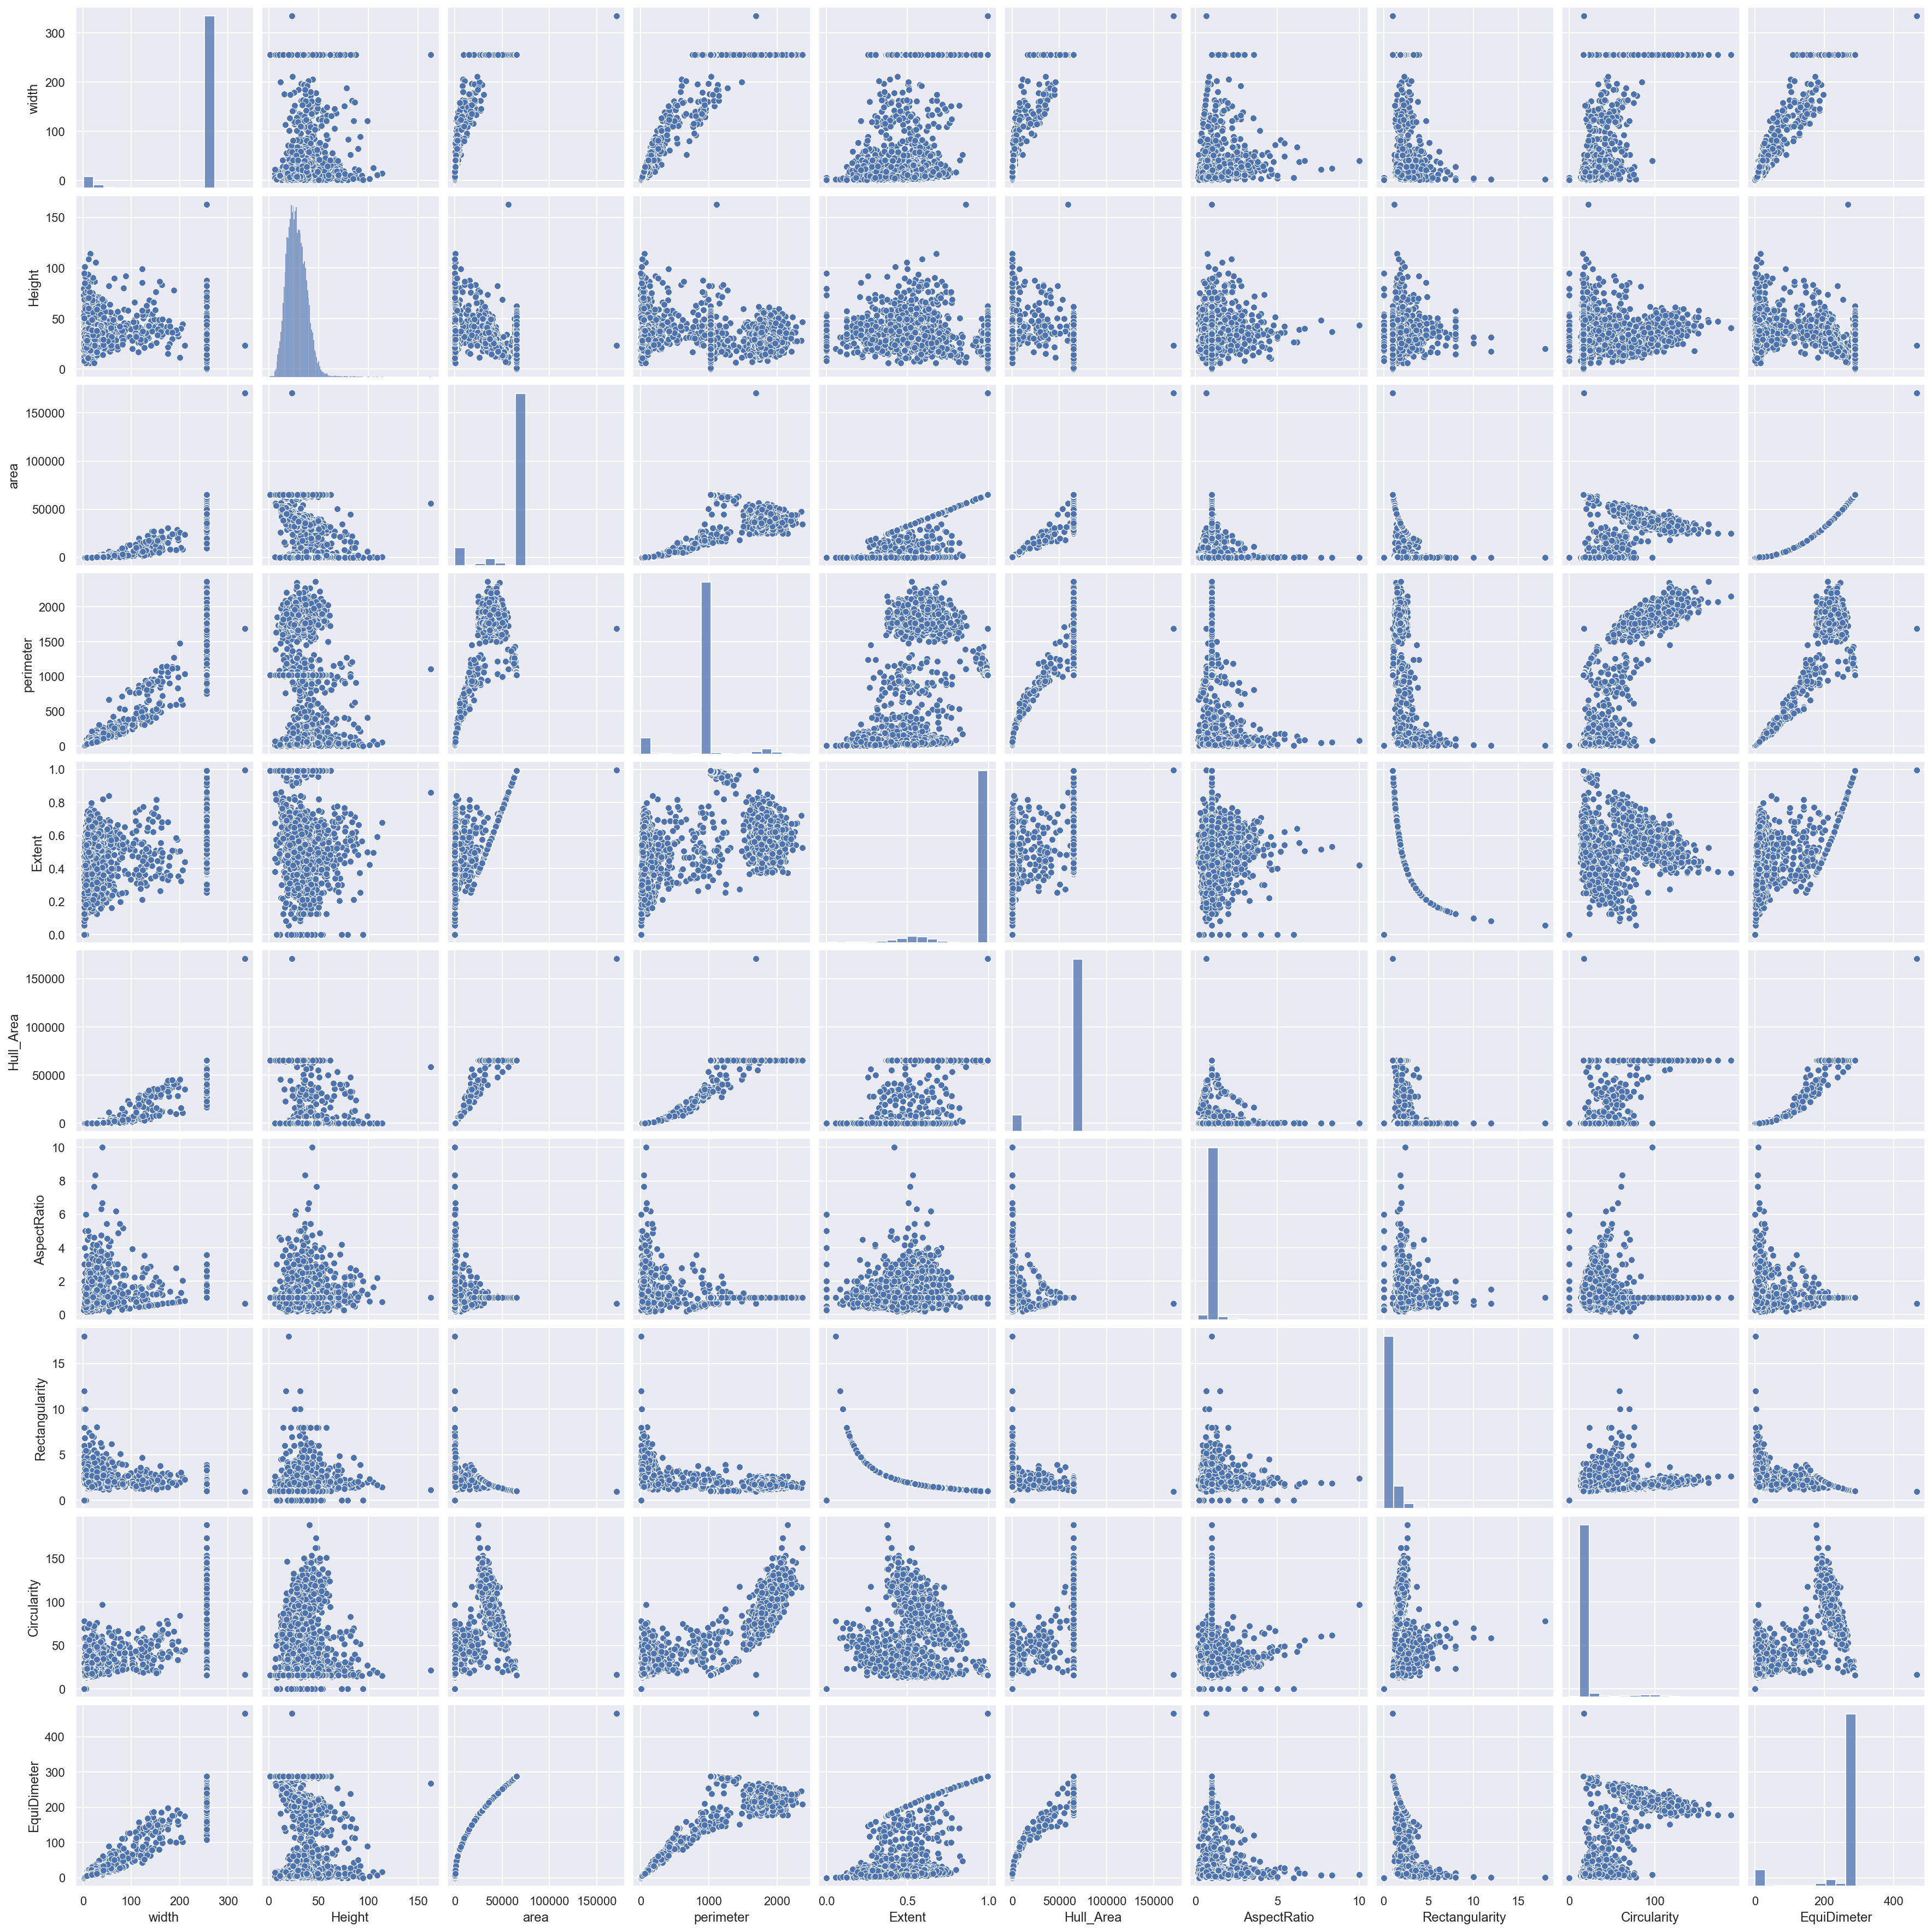

In [ ]:
cols = ['width', 'Height', 'area','perimeter', 'Extent', 'Hull_Area', 'AspectRatio', 'Rectangularity', "Circularity", "EquiDimeter" ]
sns.pairplot(df[cols], size = 2.5)
plt.show();
# perimeter -> the length of the outline of a shape. 
# extent -> The radius of the smallest circle centered at one of the points of an N-cluster

In [ ]:
import warnings  
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df = pd.read_csv('Labled_Features.csv')

X = df.iloc[:,1:]
y = df.iloc[:, 0]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, y_train.shape

((13617, 23), (13617,))

# Baseline model

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
rf = RandomForestClassifier( random_state=42)
sc = svm.SVC(kernel='linear') 
lg = LogisticRegression(random_state = 42)
dt =  DecisionTreeClassifier(random_state = 20)
my_model = [rf, sc, lg, dt]
scores = []

for m in  my_model:
  m.fit(X_train, y_train)
  y_pred = m.predict(X_test)
  name =  m.__class__.__name__
  scores.append(accuracy_score(y_test, y_pred))
  print(f"accuracy: of {name} is {accuracy_score(y_test, y_pred)}")

accuracy: of RandomForestClassifier is 0.6940528634361234
accuracy: of SVC is 0.7202643171806168
accuracy: of LogisticRegression is 0.6724669603524229
accuracy: of DecisionTreeClassifier is 0.5665198237885463


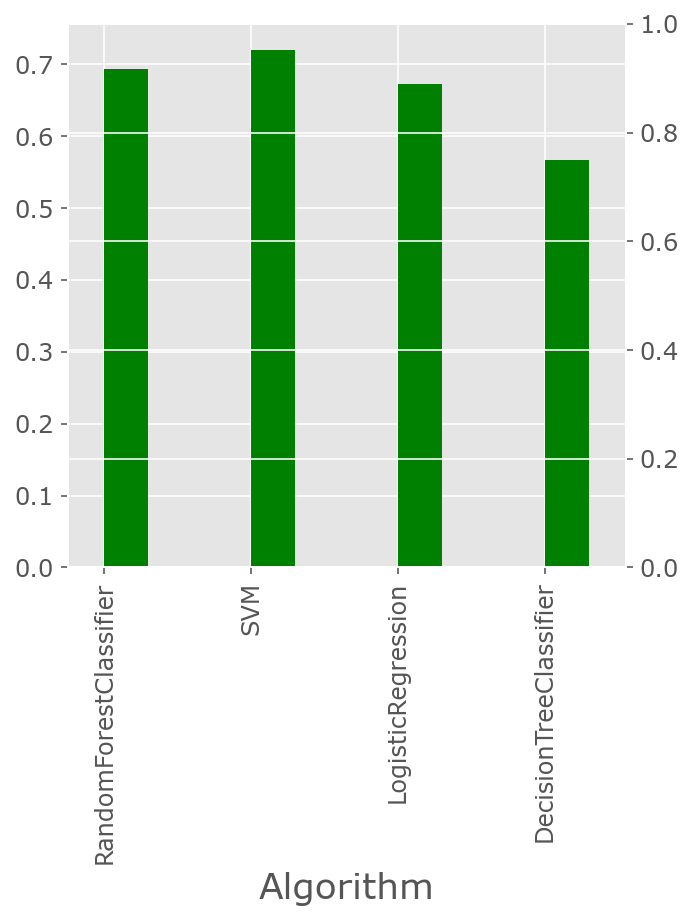

In [ ]:
model_name = ["RandomForestClassifier", "SVM", "LogisticRegression", "DecisionTreeClassifier"]
Naivescore_df_Train = pd.DataFrame({'Algorithm': model_name, 'Score': scores}).set_index('Algorithm')
fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = .3
Naivescore_df_Train.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0)
plt.show()

# importance features by RandomForest 

<AxesSubplot:title={'center':'Random Forest Feature Importances'}>

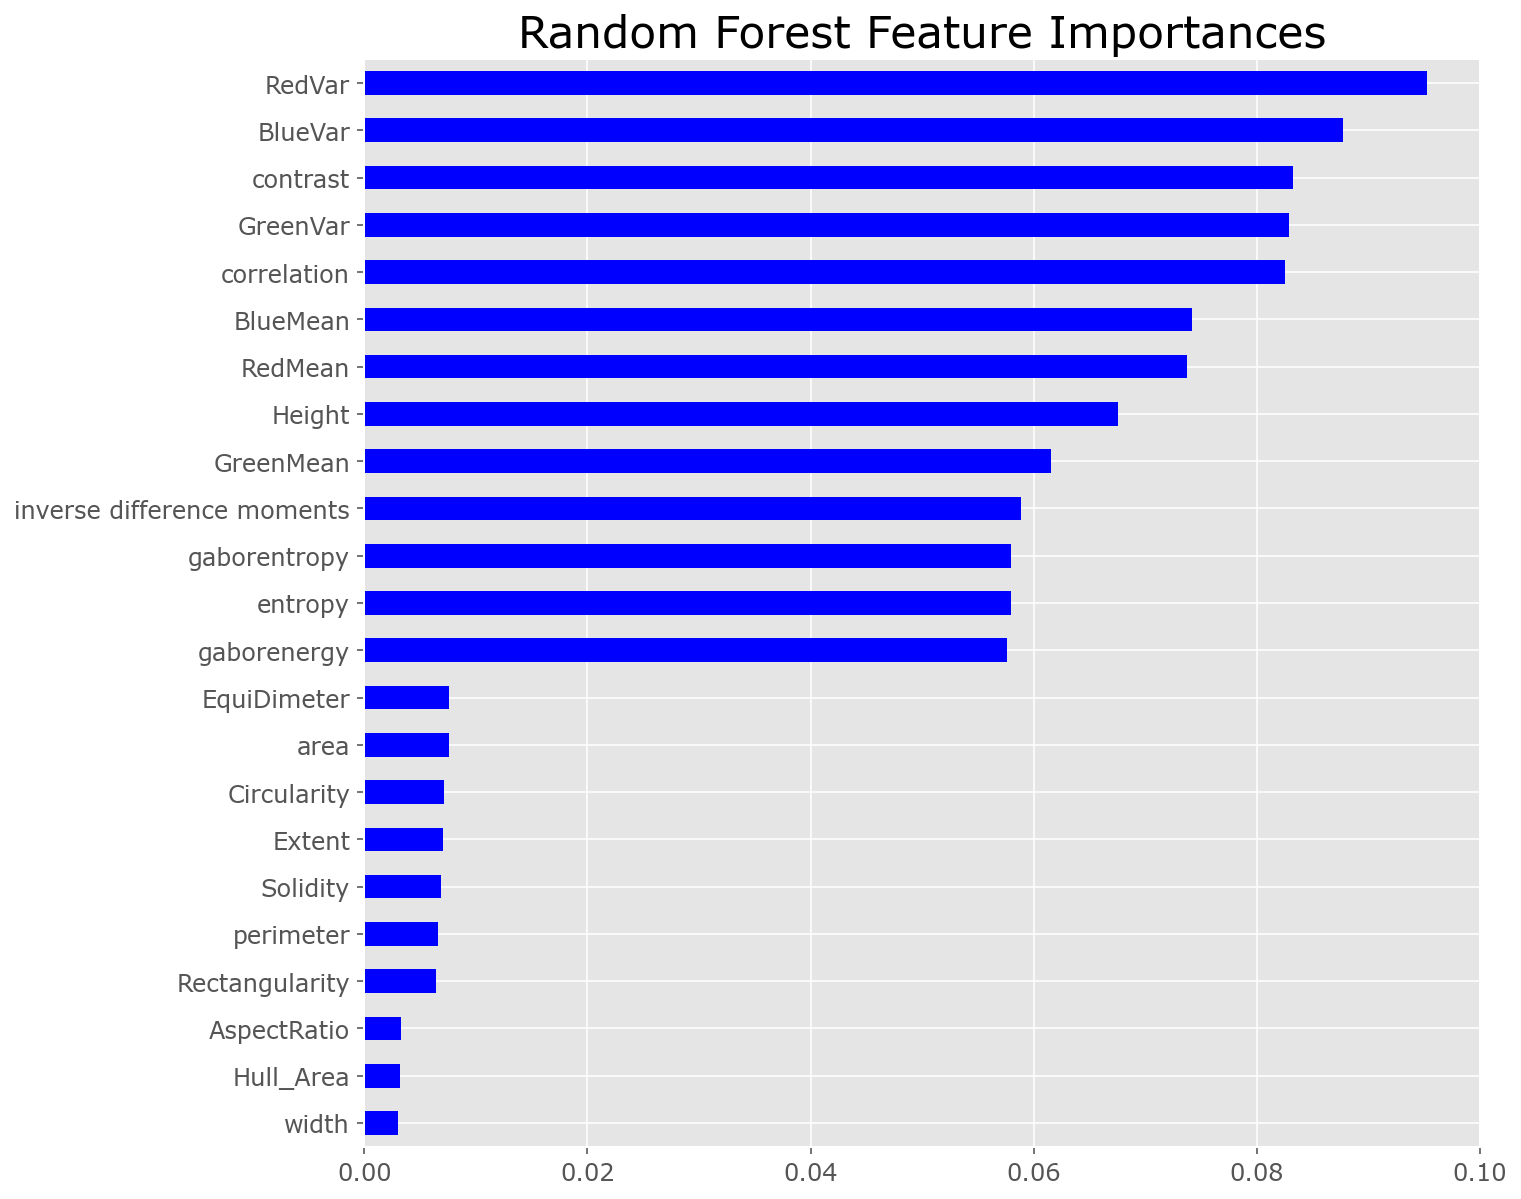

In [ ]:
RF = rf.fit(X_train, y_train)
fj = pd.Series(RF.feature_importances_, index=df.iloc[:, 1:].columns)
fig= plt.figure(figsize=(10,10))
fj.sort_values(ascending=True).plot(kind='barh',title="Random Forest Feature Importances", color = 'b')


Optimal number of features : 13


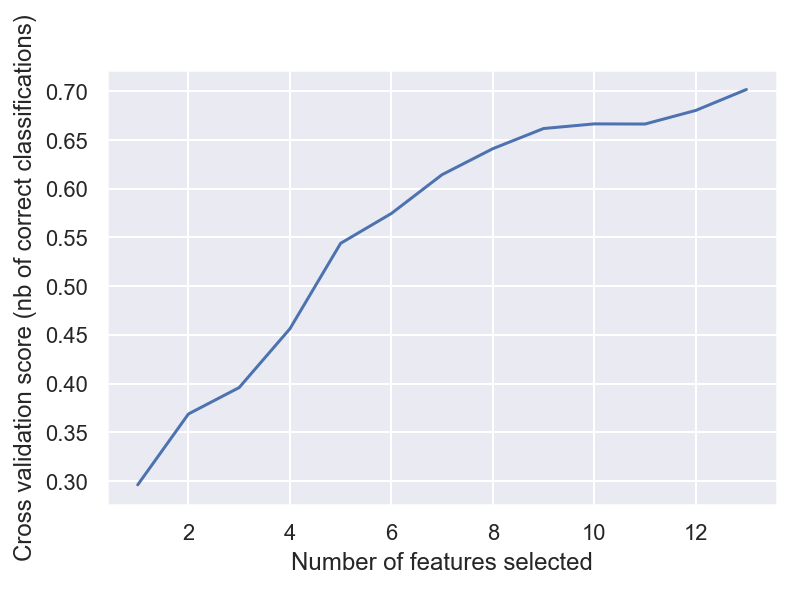

In [ ]:
from sklearn.model_selection import StratifiedKFold
Rtree_clf = RandomForestClassifier( random_state=42)
Rtree_clf = Rtree_clf.fit(X_train,y_train)
model = SelectFromModel(Rtree_clf, prefit=True)
RF_tree_featuresTrain=pd.DataFrame(X_train).loc[:, model.get_support()]
RF_tree_featuresTest = pd.DataFrame(X_test).loc[:, model.get_support()]

svc=SVC(kernel="linear")
# the optimal number of features was found from RFECV
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), 
              scoring='accuracy')
rfetrain=rfecv.fit(RF_tree_featuresTrain, y_train)
print('Optimal number of features :', rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

We will implement model with 13 features importance.

In [ ]:
rfe = RFE(estimator=svc, n_features_to_select=rfecv.n_features_, step=1)
rfe = rfe.fit(RF_tree_featuresTrain, y_train)

rfe_train=RF_tree_featuresTrain.loc[:, rfe.get_support()] # ที่เลือกมาแล้ว 13 features ที่สำคัญๆ
rfe_test=RF_tree_featuresTest.loc[:, rfe.get_support()]

print("Train Accuracy:",cross_val_score(svc,rfe_train,y_train, cv=5).mean())
scv = svc.fit(rfe_train, y_train)
y_pred = scv.predict(rfe_test)
print("Test Accuracy:",accuracy_score(y_pred, y_test))

Train Accuracy: 0.7069837459008835
Test Accuracy: 0.7145374449339207


In [ ]:
rfe_train.columns # result mathcing with above bar chart

Int64Index([0, 1, 3, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], dtype='int64')

# PCA and Isomap (with using only 13 (importance features))
we found that 13 features will achive the highest accuracy by pca eventhough the line graph below shows that only 8 components can explain almost 100%

Text(0, 0.5, 'cumulative explained variance')

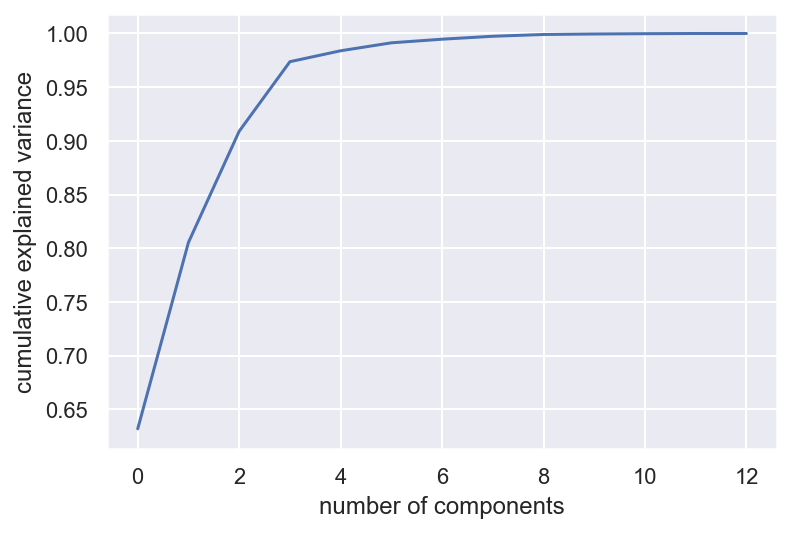

In [ ]:
pca = PCA(n_components = len(rfe_train.columns))
pca_traindata = pca.fit(rfe_train)

pca_traindata.explained_variance_
pca_traindata.n_components_
pcatrain = pca_traindata.transform(rfe_train)
pcatest = pca_traindata.transform(rfe_test)
cum_ratio = (np.cumsum(pca_traindata.explained_variance_ratio_))

plt.plot(np.cumsum(pca_traindata.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
print('Optimal number of features :', rfecv.n_features_)

Optimal number of features : 13


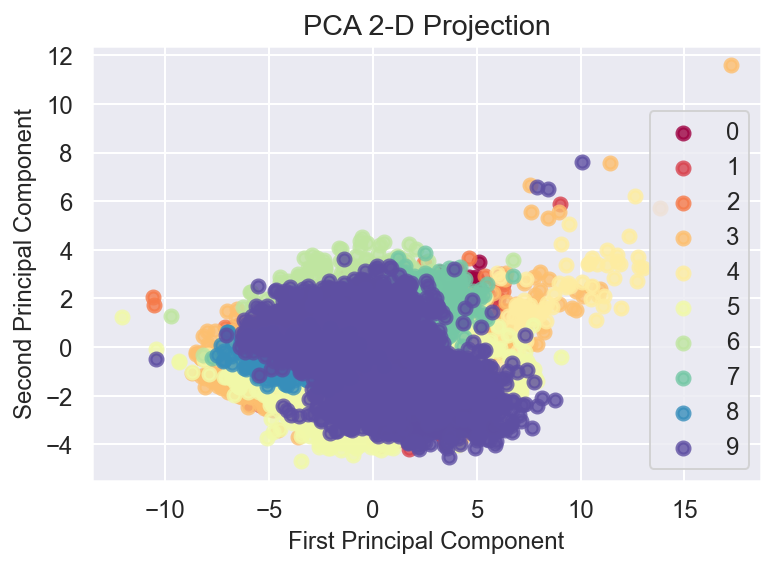

In [ ]:
import scikitplot as skplt
pca = PCA(n_components = 13)
pca_traindata = pca.fit(rfe_train)

pca_traindata.explained_variance_
pca_traindata.n_components_
pcatrain = pca_traindata.transform(rfe_train)
pcatest = pca_traindata.transform(rfe_test)
skplt.decomposition.plot_pca_2d_projection(pca, rfe_train, y_train);

In [ ]:
scv = svc.fit(pcatrain, y_train)
y_pred = scv.predict(pcatest)
print("Test Accuracy by using PCA:",accuracy_score(y_pred, y_test))

Test Accuracy by using PCA: 0.7145374449339207


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
n_components= 13
pca = PCA(n_components = n_components)
iso = Isomap(n_components=n_components)

method = [pca, iso]
scores = []
svc=SVC(kernel="linear")
for i, m in enumerate((method)):
  my_data_tot = m.fit_transform(rfe_train)
  svc.fit(rfe_train, y_train) ##
  scores.append(accuracy_score(y_test, svc.predict(pcatest)))

In [ ]:
scores 

[0.10837004405286343, 0.10837004405286343]

# Tuning Hyperparameter by GridSearchCV

In [ ]:
my_x = np.concatenate((pcatest, pcatrain))
my_y = np.concatenate((y_test, y_train)) 
x_train_g, x_test_g, y_train_g, y_test_g = train_test_split(my_x, my_y,test_size=0.7, random_state=42)
x_train_g.shape, y_train_g.shape # subsampling for GridSearchCV

((5447, 13), (5447,))

In [ ]:
param_grid = [
  {'C': [10, 100, 1000], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']},
 ]
svr = SVC()
clf = GridSearchCV(svr, param_grid,cv=5)
clf.fit(x_train_g,y_train_g) 
print(clf.best_params_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
svr = SVC(**clf.best_params_) 
scv = svr.fit(pcatrain, y_train)
y_pred = scv.predict(pcatest)
print("Test Accuracy:",accuracy_score(y_pred, y_test))
print("Train Accuracy:",cross_val_score(svr,pcatrain,y_train, cv=5).mean())

Test Accuracy: 0.8226872246696035
Train Accuracy: 0.8256587032851712


we achive slightly higher accuracy than svm baseline that implemented by 23 features.

# OneVsRestClassifier and OneVsOneClassifier

Due to the fact that support vector machines were designed for binary classification and do not support classification tasks with more than two classes. So One-vs-Rest and  One-vs-One strategy split a multi-class classification into one binary classification.  

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, f1_score
cv = KFold(n_splits = 5)
one_vs_rest = OneVsRestClassifier(svr)
one_vs_rest.fit(pcatrain,y_train) 
yhat = one_vs_rest.predict(pcatest)
print("Test Accuracy:",accuracy_score(yhat, y_test))
print("Train Accuracy:",cross_val_score(one_vs_rest,pcatrain,y_train, cv=5).mean())
print('F1:', f1_score(y_test, yhat, average='micro'))



Test Accuracy: 0.8068281938325991
Train Accuracy: 0.8088419311645023
F1: 0.8068281938325991


In [ ]:
one_vs_rest = OneVsOneClassifier(svr)
one_vs_rest.fit(pcatrain,y_train) 
yhat = one_vs_rest.predict(pcatest)
print("Test Accuracy:",accuracy_score(yhat, y_test))
print("Train Accuracy:",cross_val_score(one_vs_rest,pcatrain,y_train, cv=5).mean())
print('F1:', f1_score(y_test, yhat, average='micro'))

Test Accuracy: 0.8233480176211454
Train Accuracy: 0.8260993397732808
F1: 0.8233480176211454


SVM with feature importance and One-Vs-One classifier could achive accuracy 82.33% in test set and 82.60 in train set.

# Neural Netwrok

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory_root = '../content/drive/MyDrive/SKOLTECH SM/Intro2DA/plantvillage'

In [ ]:
def convert_image_to_array(image_dir):
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, tuple((256, 256)))   
            return img_to_array(image)
        else :
            return np.array([])

In [ ]:
image_list, label_list = [], []

print("[INFO] Loading images ...")
root_dir = listdir(directory_root)
for directory in root_dir :
    # remove .DS_Store from list
    if directory == ".DS_Store" :
        root_dir.remove(directory)

for plant_folder in root_dir :
    plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
    print(f"[INFO] Processing {plant_folder} ...")
    for image in plant_disease_folder_list[:300]:
        image_directory = f"{directory_root}/{plant_folder}/{image}"

        if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(image_directory))
            label_list.append(plant_folder)
print("[INFO] Image loading completed")  


[INFO] Loading images ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Tomato___Tomato_mosaic_virus ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Tomato___Target_Spot ...
[INFO] Image loading completed


In [ ]:
image_size = len(image_list)
image_size

2999

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('tomato_label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
print(label_binarizer.classes_)

['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']


0 = Bacterial_spot
1 = Early_blight
2= Late_blight
3 = Leaf_Mold
4 = Septoria_leaf_spot
5 = Spider_mites Two-spotted_spider_mite
6 = Target_Spot'
7 = Yellow_Leaf_Curl_Virus
8 = mosaic_virus
9 = healthy

In [ ]:
np_image_list = np.array(image_list, dtype=np.float32) / 225.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.1, random_state = 0) 
x_train, x_val, y_train, y_val = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 0) 
print('Train: ', x_train.shape)
print('Val: ', x_val.shape)
print('Test: ', x_test.shape)



mean_channel = []
std_channel = []
for i in range(x_train.shape[3]):
  mean_channel.append(np.mean(x_train[...,i]))
  std_channel.append(np.std(x_train[...,i]))
mean = np.asarray(mean_channel)
std = np.asarray(std_channel)
for i in range(3): # Considering an ordering NCHW (batch, channel, height, width)
    x_train[...,i] -= mean[i]
    x_train[...,i] /= std[i]

mean_channel = []
std_channel = []
for i in range(x_val.shape[3]):
  mean_channel.append(np.mean(x_val[...,i]))
  std_channel.append(np.std(x_val[...,i]))
mean = np.asarray(mean_channel)
std = np.asarray(std_channel)
for i in range(3): # Considering an ordering NCHW (batch, channel, height, width)
    x_val[...,i] -= mean[i]
    x_val[...,i] /= std[i]


mean_channel = []
std_channel = []
for i in range(x_test.shape[3]):
  mean_channel.append(np.mean(x_test[...,i]))
  std_channel.append(np.std(x_test[...,i]))
mean = np.asarray(mean_channel)
std = np.asarray(std_channel)
for i in range(3): # Considering an ordering NCHW (batch, channel, height, width)
    x_test[...,i] -= mean[i]
    x_test[...,i] /= std[i]


Train:  (2399, 256, 256, 3)
Val:  (600, 256, 256, 3)
Test:  (300, 256, 256, 3)


In [ ]:

from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(256*256*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 62, 62, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 21, 21, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0

In [ ]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-3),
metrics=['acc'])

In [ ]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
import tensorflow as tf
from tensorflow import keras
import math
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * math.exp(-0.1)

callback_lrs = keras.callbacks.LearningRateScheduler(scheduler)

# try to decrease lr

In [ ]:
#scheduler
#25 93.33
#32
history = model.fit(aug.flow(x_train, y_train, batch_size=32),validation_data=(x_val, y_val), steps_per_epoch=len(x_train) // 32, epochs=100, verbose=1,callbacks=[callback_lrs])

Epoch 1/100
74/74 [==============================] - 36s 425ms/step - loss: 2.8202 - acc: 0.2446 - val_loss: 49.2090 - val_acc: 0.1150
Epoch 2/100
74/74 [==============================] - 29s 397ms/step - loss: 1.8355 - acc: 0.3951 - val_loss: 3.6288 - val_acc: 0.3550
Epoch 3/100
74/74 [==============================] - 29s 396ms/step - loss: 1.5906 - acc: 0.4862 - val_loss: 7.2054 - val_acc: 0.2333
Epoch 4/100
74/74 [==============================] - 29s 397ms/step - loss: 1.4492 - acc: 0.5284 - val_loss: 2.6859 - val_acc: 0.4883
Epoch 5/100
74/74 [==============================] - 29s 397ms/step - loss: 1.2595 - acc: 0.5810 - val_loss: 2.6445 - val_acc: 0.4983
Epoch 6/100
74/74 [==============================] - 29s 398ms/step - loss: 1.1284 - acc: 0.6043 - val_loss: 2.1688 - val_acc: 0.5417
Epoch 7/100
74/74 [==============================] - 30s 399ms/step - loss: 1.0219 - acc: 0.6491 - val_loss: 2.9022 - val_acc: 0.4917
Epoch 8/100
74/74 [==============================] - 29s 397m

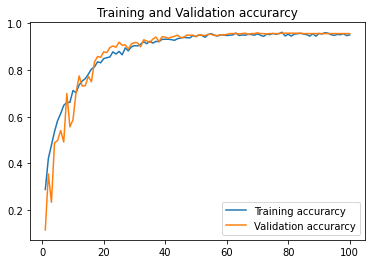

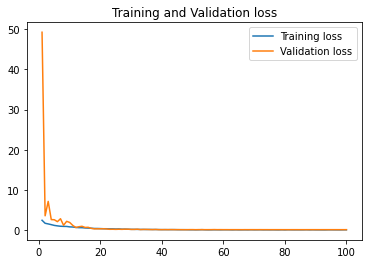

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc,  label='Training accurarcy')
plt.plot(epochs, val_acc, label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
y_true = []
for i in range(y_test.shape[0]):
 y_true.append((np.argmax(y_test[i])))

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(x_test)

accuracy_score(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9466666666666667

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

    
confusion_matrix(y_true, y_pred)

array([[31,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 22,  1,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  3, 20,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0, 39,  1,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  1, 26,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0, 25,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 28]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.85      0.92      0.88        24
           2       0.95      0.80      0.87        25
           3       0.89      1.00      0.94        31
           4       1.00      1.00      1.00        34
           5       0.97      0.91      0.94        43
           6       0.96      0.93      0.95        28
           7       0.96      0.93      0.94        27
           8       0.97      1.00      0.98        28
           9       0.97      1.00      0.98        28

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 17ms/step - loss: 0.2167 - acc: 0.9467


[0.2166578471660614, 0.9466666579246521]